# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

## 1. Create a 4 dimensional data set with 64 elements and show all 4 scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$,  $x_3$ vs. $y$, $x_4$ vs. $y$

In [2]:
n = 64

x = np.linspace(0, 1, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T


y = np.linspace(0, 1, n) + np.random.rand(n) - 1

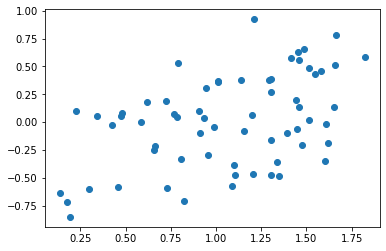

In [3]:
plt.scatter(x.T[0], y)

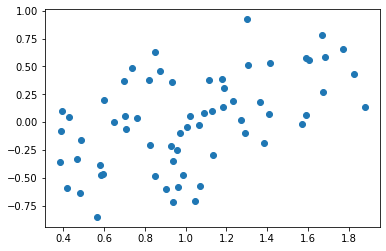

In [4]:
plt.scatter(x.T[1], y)

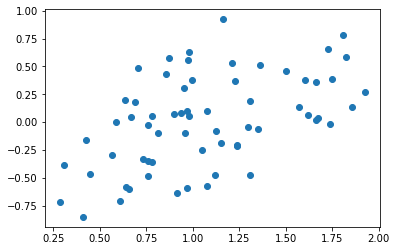

In [5]:
plt.scatter(x.T[2], y)

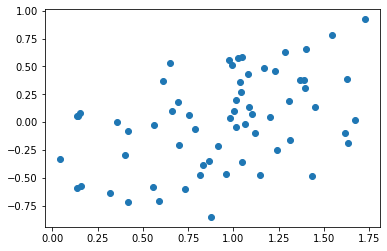

In [6]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model (like we did in class) to fit the data. *Use the example from Lesson 3 and do not use a library that calculates automatically*. We are expecting 5 coefficients to describe the linear model. 

## After creating the model (finding the coefficients), create a new column $y_p=\Sigma\beta_n\cdot x_n$ 

In [7]:
left = np.linalg.inv(np.dot(x.T, x))
right = np.dot(y.T, x)
linmod = np.dot(left, right)
linmod

array([ 0.1280997 ,  0.27850878,  0.23633877,  0.16720986, -0.81850221])

In [8]:
# checking values aligned
check = np.linalg.lstsq(x, y)[0]
check

<ipython-input-8-48926172da39>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  check = np.linalg.lstsq(x, y)[0]


array([ 0.1280997 ,  0.27850878,  0.23633877,  0.16720986, -0.81850221])

In [9]:
pred1 = np.dot(x, linmod)

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

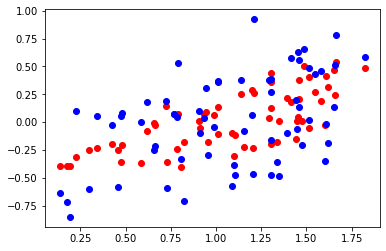

In [10]:
plt.scatter(x.T[0], pred1, c = 'red')
plt.scatter(x.T[0], y, c = 'b')

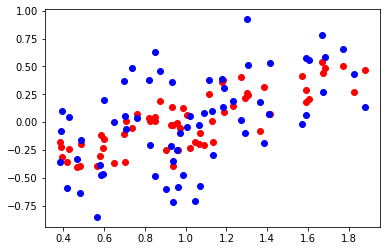

In [11]:
plt.scatter(x.T[1], pred1, c = 'red')
plt.scatter(x.T[1], y, c = 'b')

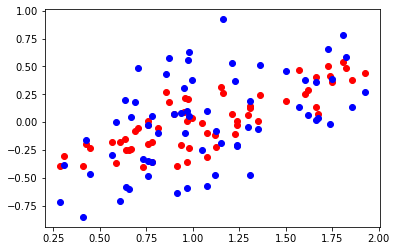

In [12]:
plt.scatter(x.T[2], pred1, c = 'red')
plt.scatter(x.T[2], y, c = 'b')

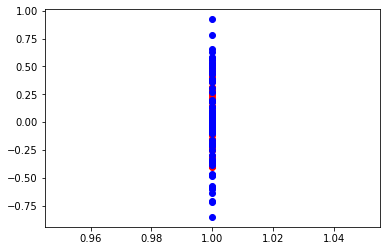

In [13]:
plt.scatter(x.T[4], pred1, c = 'red')
plt.scatter(x.T[4], y, c = 'b')

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating (Column `Rating`)

In [14]:
credit = pd.read_csv('Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [15]:
x = credit['Balance']
y = credit['Rating']
n = len(credit['Balance'])

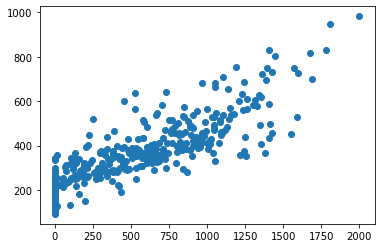

In [16]:
plt.scatter(x,y) # Balance appears to have a direct linear relationship with Rating

In [17]:
m_numer = np.sum(x) * np.sum(y)/n - np.sum(x * y) 
m_denom = np.sum(x) * np.sum(x)/n - np.sum(x * x) 
m_numer/m_denom

0.29063856962712353

In [18]:
b = (np.sum(x * x) * np.sum(y) - np.sum(x) * np.sum(x * y))/(n * np.sum(x * x) - np.sum(x) * np.sum(x))
b

# y = 0.291(x) + 203.804

203.80358421535135

## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [19]:
columns = ['Age', 'Education', 'Cards']
X = credit[columns].values

X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[34., 11.,  2.,  1.],
       [82., 15.,  3.,  1.],
       [71., 11.,  4.,  1.],
       ...,
       [67., 12.,  5.,  1.],
       [44., 13.,  1.,  1.],
       [64.,  7.,  5.,  1.]])

In [20]:
y = credit['Rating']
y

0      283
1      483
2      514
3      681
4      357
      ... 
395    307
396    296
397    321
398    192
399    415
Name: Rating, Length: 400, dtype: int64

In [21]:
beta = np.linalg.lstsq(X, y)[0]

<ipython-input-21-52569296c94f>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X, y)[0]


### 5. Plot your results using scatter plots (just like in class). Show as many of your columns vs. credit rating that you can.

In [22]:
pred2 = np.dot(X, beta)

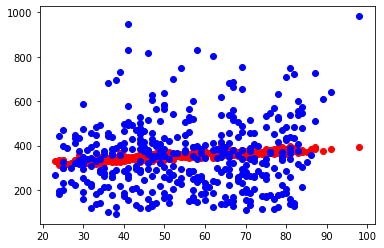

In [23]:
plt.scatter(X.T[0], pred2, c = 'red')
plt.scatter(X.T[0], y, c = 'b')

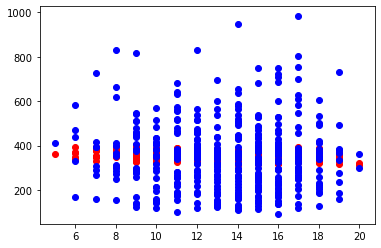

In [24]:
plt.scatter(X.T[1], pred2, c = 'red')
plt.scatter(X.T[1], y, c = 'b')

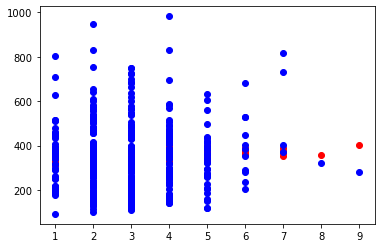

In [25]:
plt.scatter(X.T[2], pred2, c = 'red')
plt.scatter(X.T[2], y, c = 'b')

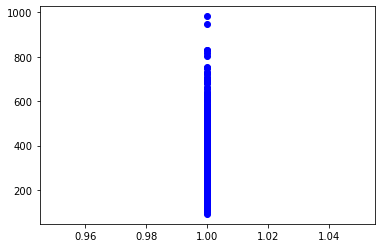

In [26]:
plt.scatter(X.T[3], pred2, c = 'red')
plt.scatter(X.T[3], y, c = 'b')